## Machine Learning Parcial 2
- ### Antonio Jose Patiño Torres T00056470
- ### Maria Angelica Becerra Pico

UTB - 11/oct/2021

In [35]:
import io
import sys
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/centurion/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
raw = pd.read_csv("tweets_politica_kaggle.csv", sep="\t")

In [3]:
raw.head()

,cuenta,partido,timestamp,tweet
0,a34133350b0605cb24081843f63176ca,psoe,1.363973e+09,@vesteve3 @manubenas @ccoo_rm @desobediencia_ ...
1,a34133350b0605cb24081843f63176ca,psoe,1.364061e+09,"“@kirovast: @Hugo_Moran muy fan de la ""radical..."
2,a34133350b0605cb24081843f63176ca,psoe,1.364117e+09,@ALTAS_PRESIONES Nuevos dueños para las renova...
3,a34133350b0605cb24081843f63176ca,psoe,1.364121e+09,@jumanjisolar @solartradex @josea_dolera El di...
4,a34133350b0605cb24081843f63176ca,psoe,1.364153e+09,“@cesarnayu: https://t.co/J4OTXj1x7w … Por fav...


In [4]:
raw.info() # Aprox 10 cuentas tienen valores nulos (null) en campos tweet, partido, timestamp

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130039 entries, 0 to 130038
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   cuenta     130039 non-null  object 
 1   partido    130029 non-null  object 
 2   timestamp  130029 non-null  float64
 3   tweet      130029 non-null  object 
dtypes: float64(1), object(3)
memory usage: 4.0+ MB


In [5]:
nan_values = raw[raw.isna().any(axis=1)] # Culpables >:(
nan_values

,cuenta,partido,timestamp,tweet
130029,c736f426051ce1703b6d62686b64dbac,NaN,NaN,NaN
130030,c736f426051ce1703b6d62686b64dbac,NaN,NaN,NaN
130031,c736f426051ce1703b6d62686b64dbac,NaN,NaN,NaN
130032,c736f426051ce1703b6d62686b64dbac,NaN,NaN,NaN
130033,c736f426051ce1703b6d62686b64dbac,NaN,NaN,NaN
130034,c736f426051ce1703b6d62686b64dbac,NaN,NaN,NaN
130035,c736f426051ce1703b6d62686b64dbac,NaN,NaN,NaN
130036,c736f426051ce1703b6d62686b64dbac,NaN,NaN,NaN
130037,c736f426051ce1703b6d62686b64dbac,NaN,NaN,NaN
130038,c736f426051ce1703b6d62686b64dbac,NaN,NaN,NaN


In [6]:
raw = raw.drop(nan_values.index)

In [7]:
afiliaciones = raw.groupby("partido", as_index=False)['tweet'].count()
afiliaciones

,partido,tweet
0,ciudadanos,23552
1,podemos,24889
2,pp,26200
3,psoe,28882
4,vox,26506


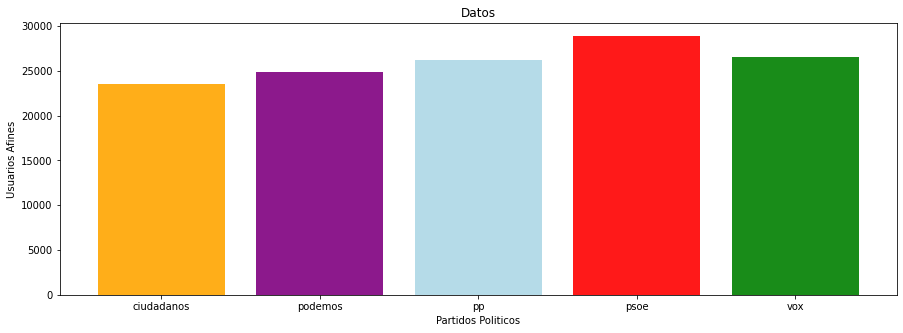

In [8]:
plt.figure(figsize=(15,5))
plt.bar(afiliaciones['partido'].values, afiliaciones['tweet'].values, color=["orange", "purple", "lightblue", "red", "green"], alpha=0.9)
plt.title('Datos')
plt.ylabel('Usuarios Afines', fontsize=10)
plt.xlabel('Partidos Politicos', fontsize=10)
plt.show()

In [9]:
afiliaciones.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   partido  5 non-null      object
 1   tweet    5 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 120.0+ bytes


In [10]:
train = raw.sample(frac=0.8)
test = raw.drop(train.index)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104023 entries, 43849 to 13252
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   cuenta     104023 non-null  object 
 1   partido    104023 non-null  object 
 2   timestamp  104023 non-null  float64
 3   tweet      104023 non-null  object 
dtypes: float64(1), object(3)
memory usage: 4.0+ MB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26006 entries, 6 to 130026
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cuenta     26006 non-null  object 
 1   partido    26006 non-null  object 
 2   timestamp  26006 non-null  float64
 3   tweet      26006 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1015.9+ KB


In [59]:
c = train["tweet"]
es_stops = set(stopwords.words('spanish'))
vectorizer = CountVectorizer(ngram_range=(1,1), max_features=1000, stop_words=set(es_stops)) # to use bigrams ngram_range=(2,2)
bow = vectorizer.fit_transform(list(c)) # Bag of Words

In [60]:
list(c.head())

['“Un Gobierno de Coalición ... con la sociedad y para la sociedad”Solo la consistencia y el apoyo de la mayoría social podrá sostener la alianza PSOE &amp; UP, aunque se tensione o dude de su continuidad.Por @antonigr / Vía @elperiodico / IMPRESCINDIBLEhttps://t.co/jV6EHTBWh6',
 'Pablo Motos me ha preguntado en El Hormiguero por qué los poderosos, aquellos que están acostumbrados a mandar en España sin presentarse a las elecciones, le tienen "manía" a Unidas Podemos.   Esto es lo que le he respondido 👇🏾 #PabloIglesiasEH https://t.co/gXo2j37V79',
 'Se va un gran campeón.Gracias Jorge por lo que nos has hecho vivir.https://t.co/xRSYKW2o9Y',
 '@mercedes_cd Y yo😂',
 '▶ ”Es bochornoso que Podemos despache un caso de corrupción de 680 millones de euros con un tuit.” @JuanMa_Moreno en @elprogramadear https://t.co/9MsmvuyTFu']

In [61]:
vectorizer.get_feature_names()

['00',
 '000',
 '00h',
 '10',
 '100',
 '10n',
 '11',
 '12',
 '13',
 '14',
 '15',
 '17',
 '18',
 '19',
 '20',
 '2019',
 '2020',
 '2021',
 '21',
 '22',
 '24',
 '25',
 '26m',
 '28a',
 '30',
 '30h',
 '40',
 '4m',
 '50',
 '500',
 '8m',
 '_infolibre',
 'abalosmeco',
 'abrazo',
 'abrir',
 'acaba',
 'acabar',
 'acceso',
 'acción',
 'actividad',
 'acto',
 'actualidad',
 'actualidadcs',
 'actuar',
 'acuerdo',
 'acuerdos',
 'adelante',
 'además',
 'adrilastra',
 'afectados',
 'afrontar',
 'agenda',
 'agentes',
 'agua',
 'ahora',
 'ahí',
 'alarma',
 'albert_rivera',
 'alcalde',
 'alejandrotgn',
 'alguien',
 'allí',
 'almeidapp_',
 'alquiler',
 'alternativa',
 'alto',
 'altura',
 'amenaza',
 'amigo',
 'amigos',
 'and',
 'andaluces',
 'andalucía',
 'apoyar',
 'apoyo',
 'aprobado',
 'aquellos',
 'aquí',
 'artículo',
 'as',
 'asamblea',
 'asesinato',
 'así',
 'ataque',
 'ataques',
 'atención',
 'atrás',
 'aunque',
 'autónomos',
 'avance',
 'avanzando',
 'avanzar',
 'ayer',
 'ayuda',
 'ayudar',
 'ayuda

In [62]:
bow

<104023x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 944662 stored elements in Compressed Sparse Row format>

In [63]:
from sklearn.metrics import confusion_matrix
from sklearn import svm

In [64]:
svm_lineal = svm.LinearSVC(C=1, max_iter=10000).fit(bow, train["partido"])

In [65]:
d = test["tweet"]
vectorizer2 = CountVectorizer(ngram_range=(1,1), max_features=500,  vocabulary=vectorizer.get_feature_names()) # to use bigrams ngram_range=(2,2)
bow_test = vectorizer2.fit_transform(list(d)) # Bag of Words Test

In [66]:
acuracy_linear_svm = svm_lineal.score(bow_test, test["partido"])
print(acuracy_linear_svm)

0.6062447127585942


In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
softmax = LogisticRegression(multi_class="multinomial", solver="lbfgs", C = 10, max_iter=10000)
softmax.fit(bow, train["partido"]) # Mucho mejor running time que SVM

LogisticRegression(C=10, max_iter=10000, multi_class='multinomial')

In [69]:
acuracy_softmax = softmax.score(bow_test, test["partido"])
print(acuracy_softmax) # Inicialmente misma (muy parecida) accurracy que SMV

0.6056294701222795


In [ ]:
# Primera iteracion:  SVM 0.5384911174344382       SoftMax 0.5396831500422979
# Segunda iteracion:  SVM 0.5461047450588326       SoftMax 0.5480658309620857   usando stop_words
# Tercera iteracion:  SVM 0.6062447127585942       SoftMax 0.6056294701222795   1000 features, stop_words

In [73]:
from sklearn.model_selection import cross_val_score
cross_smv = cross_val_score(svm_lineal, bow, train["partido"], scoring="f1_macro")
cross_smv

array([0.60587656, 0.6001824 , 0.59752931, 0.60510497, 0.59799131])

In [ ]:
# naid bayes, random forest